# GLOBAL_ANALYSIS_FORECAST_WAV_001_027

The product is organized in 2 datasets:

| dataset | time | space | mode | variables | name of file |
| :--- | :--- | :--- | :--- | :--- | :--- |
| global-analysis-forecast-wav-001-02 | 3 hourly | surface | instantaneous | all except bathymetry | mfwamglocep_\\${date1}_R\\${date2}.nc |
| global-analysis-forecast-wav-001-027-statics | static | - | - | bathymetry | GLO-MFC_001_027_bathy.nc |

date1: integer (format YYYYMMDD) corresponding to the field date <br>
date2: integer (format YYYYMMDD) corresponding to the analysis date 

5-days forecasts which are overriden by analyses later

| variable | explanation | unit | 
| :--- | :--- | :--- |
| VHM0 | Spectral significant wave height (Hm0) | m | 
| VMDR_WW | Mean wind wave direction from | degree | 
| | VHM0_WW | Spectral significant wind wave height | m | 
| VMDR_SW1 | Mean primary swell wave direction from | degree |
| VTM01_SW1 | Spectral moments (0,1) primary swell wave period | s | 
| VMDR_SW2 | Mean secondary swell wave direction from | degree | 
| VTM01_SW2 | Spectral moments (0,1) secondary swell wave period | s | 
| VMDR | Mean wave direction from (Mdir) | degree | 
| VTM10 | Spectral moments (-1,0) wave period (Tm-10) | s | 
| VHM0_SW1 | Spectral significant primary swell wave height | m | 
| VHM0_SW2 | Spectral significant secondary swell wave height | m | 
| VTPK | Wave period at spectral peak / peak period (Tp) | s | 
| VSDX | Stokes drift U | m/s | 
| VSDY | Stokes drift V | m/s | 
| VPED | Wave principal direction at spectral peak | degree | 
| VTM02 | Spectral moments (0,2) wave period (Tm02) | s | 
| VTM01_WW | Spectral moments (0,1) wind wave period | s | 

# Preparation

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

In [2]:
path = os.path.join('..','..','..','..','data','CMEMS','GLOBAL_ANALYSIS_FORECAST_WAV_001_027')
file = os.path.join(path,'mfwamglocep_2020120100_R20201202.nc')
file

'../../../../data/CMEMS/GLOBAL_ANALYSIS_FORECAST_WAV_001_027/mfwamglocep_2020120100_R20201202.nc'

In [3]:
def hide_axes(ax):
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

# Metadata

In [4]:
ds = nc.Dataset(file)
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.6
    time_coverage_start: 20201201-03:00:00
    time_coverage_end: 20201202-00:00:00
    date_created: 20201202-06:35:00
    product_type: hindcast
    product: GLOBAL_ANALYSIS_FORECAST_WAV_001_027
    product_ref_date: 20201201-00:00:00
    product_range: D-1
    product_user_manual: http://marine.copernicus.eu/documents/PUM/CMEMS-GLO-PUM-001-027.pdf
    quality_information_document:  http://marine.copernicus.eu/documents/QUID/CMEMS-GLO-QUID-001-027.
    dataset: global-analysis-forecast-wav-001-027
    title: Mean fields from global wave model MFWAM of Meteo-France with ECMWF forcing
    institution: METEO-FRANCE
    references: http://marine.copernicus.eu
    credit: E.U. Copernicus Marine Service Information (CMEMS)
    licence: http://marine.copernicus.eu/services-portfolio/service-commitments-and
    contact: servicedesk.cmems@mercator-ocean.eu
    producer: CMEMS 

"The fields are 3-hourly instantaneous at 00, 03, 06, 09, 12, 15, 18, 21 UTC." (PRODUCT USER MANUAL)

In [5]:
print(ds.dimensions)

OrderedDict([('longitude', <class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 4320), ('latitude', <class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 2041), ('time', <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 8)])


In [6]:
for var in ds.variables.values():
    print(var)
    print('---------------------------------------')

<class 'netCDF4._netCDF4.Variable'>
float64 longitude(longitude)
    standard_name: longitude
    long_name: longitude coordinate
    units: degrees_east
    axis: X
    step: 0.08332825
unlimited dimensions: 
current shape = (4320,)
filling on, default _FillValue of 9.969209968386869e+36 used
---------------------------------------
<class 'netCDF4._netCDF4.Variable'>
float64 latitude(latitude)
    standard_name: latitude
    long_name: latitude coordinate
    units: degrees_north
    axis: Y
    step: 0.08333588
unlimited dimensions: 
current shape = (2041,)
filling on, default _FillValue of 9.969209968386869e+36 used
---------------------------------------
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: time
    units: hours since 1950-01-01 00:00:00
    calendar: standard
    axis: T
    step: 3
unlimited dimensions: time
current shape = (8,)
filling on, default _FillValue of 9.969209968386869e+36 used
-----------------------------------

In [7]:
# Variables
for var in ds.variables:
    print(var)

longitude
latitude
time
VHM0
VMDR_WW
VHM0_WW
VMDR_SW1
VTM01_SW1
VMDR_SW2
VTM01_SW2
VMDR
VTM10
VHM0_SW1
VHM0_SW2
VTPK
VSDX
VSDY
VPED
VTM02
VTM01_WW


In [8]:
# Per index
list(ds.variables.items())[0]

('longitude',
 <class 'netCDF4._netCDF4.Variable'>
 float64 longitude(longitude)
     standard_name: longitude
     long_name: longitude coordinate
     units: degrees_east
     axis: X
     step: 0.08332825
 unlimited dimensions: 
 current shape = (4320,)
 filling on, default _FillValue of 9.969209968386869e+36 used)

In [9]:
# Per key
ds['longitude']

<class 'netCDF4._netCDF4.Variable'>
float64 longitude(longitude)
    standard_name: longitude
    long_name: longitude coordinate
    units: degrees_east
    axis: X
    step: 0.08332825
unlimited dimensions: 
current shape = (4320,)
filling on, default _FillValue of 9.969209968386869e+36 used

# Data

In [10]:
# Dictionaries for plot labelling

param_dict = {
    'VHM0': {'variable': 'Spectral significant wave height (Hm0)', 'unit': 'm'},
    'VMDR_WW': {'variable': 'Mean wind wave direction from', 'unit': 'degree'},
    'VHM0_WW': {'variable': 'Spectral significant wind wave height', 'unit': 'm'},
    'VMDR_SW1': {'variable': 'Mean primary swell wave direction from', 'unit': 'degree'},
    'VTM01_SW1':{'variable': 'Spectral moments (0,1) primary swell wave period', 'unit': 's'},
    'VMDR_SW2': {'variable': 'Mean secondary swell wave direction from', 'unit': 'degree'},
    'VTM01_SW2': {'variable': 'Spectral moments (0,1) secondary swell wave period', 'unit': 's'},
    'VMDR': {'variable': 'Mean wave direction from (Mdir)', 'unit': 'degree'},
    'VTM10': {'variable': 'Spectral moments (-1,0) wave period (Tm-10)', 'unit': 's'},
    'VHM0_SW1': {'variable': 'Spectral significant primary swell wave height', 'unit': 'm'},
    'VHM0_SW2': {'variable': 'Spectral significant secondary swell wave height', 'unit': 'm'},
    'VTPK': {'variable': 'Wave period at spectral peak / peak period (Tp)', 'unit': 's'},
    'VSDX': {'variable': 'Stokes drift U', 'unit': 'm/s'},
    'VSDY': {'variable': 'Stokes drift V', 'unit': 'm/s'},
    'VPED': {'variable': 'Wave principal direction at spectral peak', 'unit': 'degree'},
    'VTM02': {'variable': 'Spectral moments (0,2) wave period (Tm02)', 'unit': 's'},
    'VTM01_WW': {'variable': 'Spectral moments (0,1) wind wave period', 'unit': 's'}
}


time_dict = {
    0: '00 UTC',
    1: '03 UTC',
    2: '06 UTC',
    3: '09 UTC',
    4: '12 UTC',
    5: '15 UTC',
    6: '18 UTC',
    7: '21 UTC',
}

## One variable 

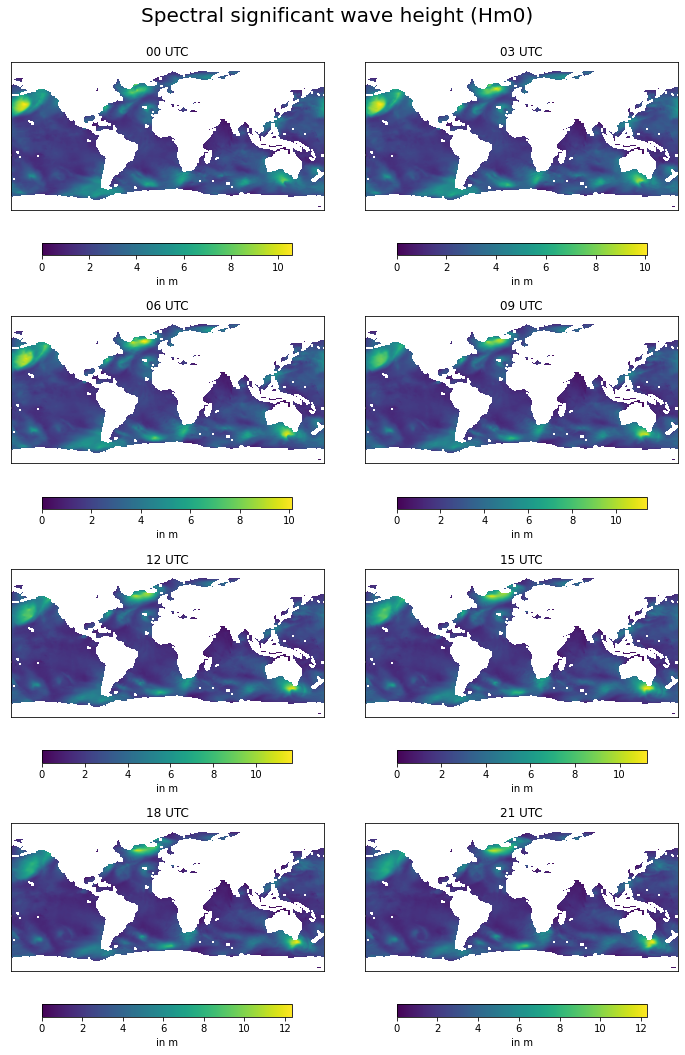

In [11]:
parameter = 'VHM0'

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(10,15))
ax_list = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
im_list = []
fig.tight_layout(rect=[0, 0, 1, 0.95])

fig.suptitle(param_dict[parameter]['variable'], fontsize=20)

for idx, ax in enumerate(ax_list):
    im = ax.imshow(np.flipud(ds[parameter][idx, :, :]), extent=[0,4320,0,2041])
    im_list.append(im)
    ax.title.set_text(time_dict[idx])
    hide_axes(ax)  

    fig.colorbar(im, ax=ax, orientation='horizontal', label='in {}'.format(param_dict[parameter]['unit']), shrink=0.8);

## All variables 

In [12]:
variables = list(ds.variables.keys())[3:] # remove [longitude, latitude, time]
variables

['VHM0',
 'VMDR_WW',
 'VHM0_WW',
 'VMDR_SW1',
 'VTM01_SW1',
 'VMDR_SW2',
 'VTM01_SW2',
 'VMDR',
 'VTM10',
 'VHM0_SW1',
 'VHM0_SW2',
 'VTPK',
 'VSDX',
 'VSDY',
 'VPED',
 'VTM02',
 'VTM01_WW']

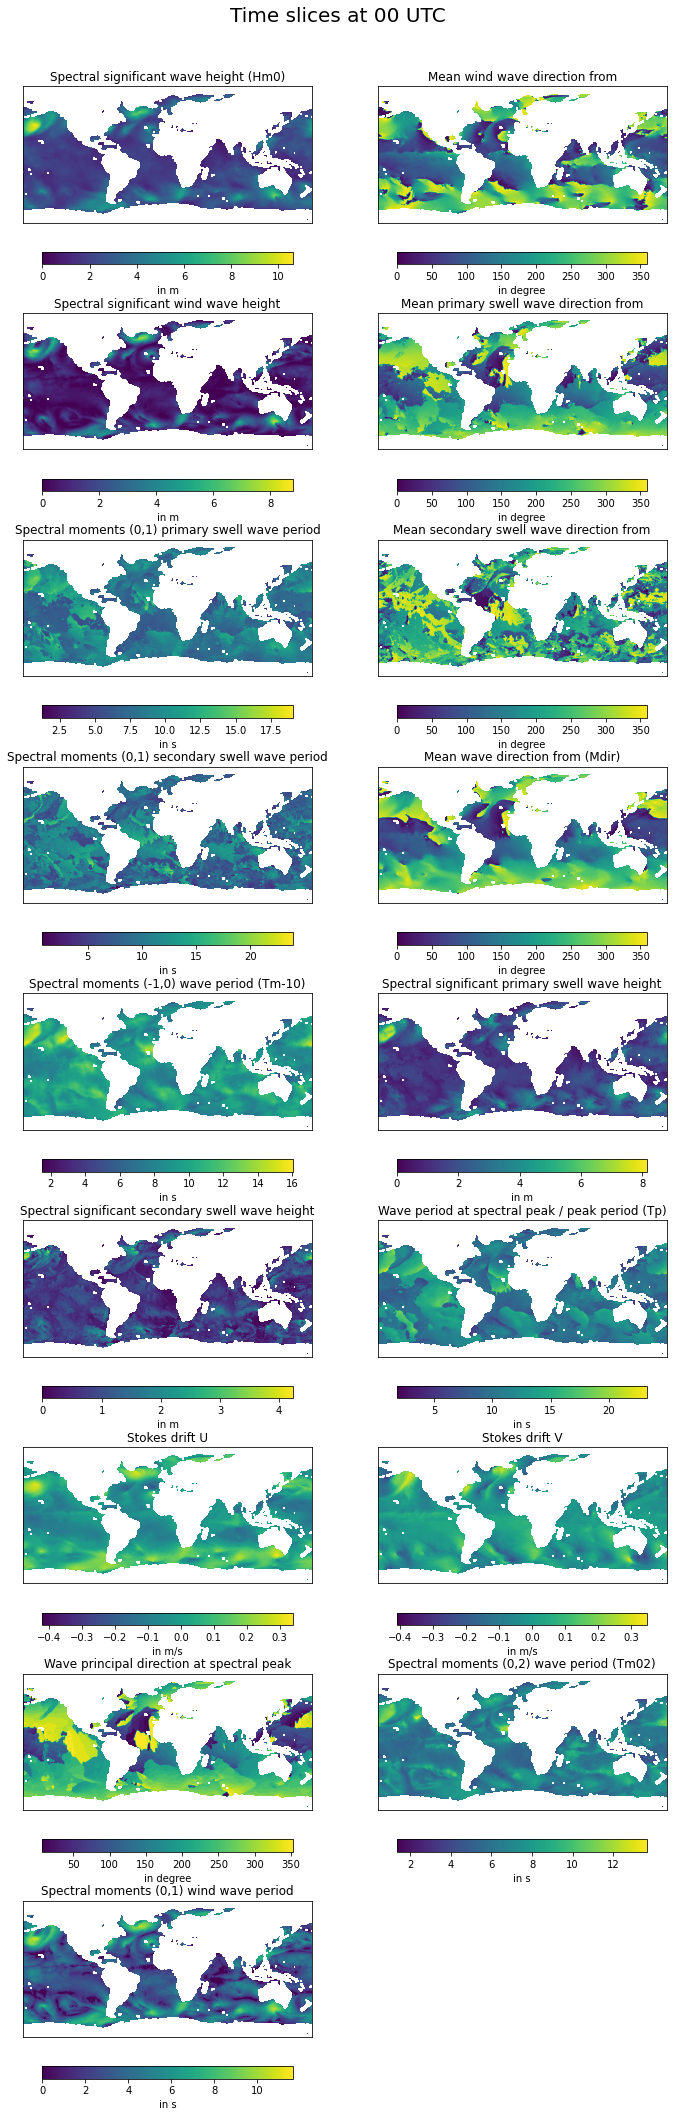

In [13]:
time_slice = 0

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6),
      (ax7, ax8), (ax9, ax10), (ax11, ax12),
      (ax13, ax14), (ax15, ax16), (ax17, ax18)) = plt.subplots(9, 2, figsize=(10,30))

fig.tight_layout(rect=[0, 0, 1, 0.95])

ax_list = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17]
im_list = []
fig.suptitle('Time slices at {}'.format(time_dict[time_slice]), fontsize=20)
fig.delaxes(ax18)   

for idx, ax in enumerate(ax_list):
    im = ax.imshow(np.flipud(ds[variables[idx]][time_slice, :, :]), extent=[0,4320,0,2041])
    im_list.append(im)
    ax.title.set_text(param_dict[variables[idx]]['variable'])
    hide_axes(ax)  

    fig.colorbar(im, ax=ax, orientation='horizontal', label='in {}'.format(param_dict[variables[idx]]['unit']), shrink=0.8);

# For exporting

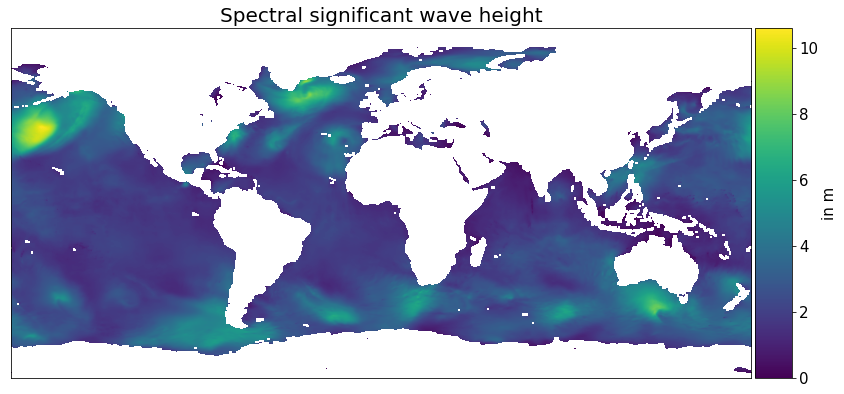

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

parameter = 'VHM0'
idx = 0

fig = plt.figure(figsize=(14,20))
ax = plt.gca()
ax.set_title('Spectral significant wave height', fontsize=20)
im = ax.imshow(np.flipud(ds[parameter][idx, :, :]), extent=[0,4320,0,2041])
hide_axes(im)      
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('in {}'.format(param_dict[parameter]['unit']), size=15)
cbar.ax.tick_params(labelsize=15) 

## Statics (bathymetry) 

In [15]:
path = os.path.join('..','..','..','..','data','CMEMS','GLOBAL_ANALYSIS_FORECAST_WAV_001_027')
file = os.path.join(path,'GLO-MFC_001_027_bathy.nc')
file

'../../../../data/CMEMS/GLOBAL_ANALYSIS_FORECAST_WAV_001_027/GLO-MFC_001_027_bathy.nc'

In [16]:
ds = nc.Dataset(file)
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: Bathymetry for product GLOBAL_ANALYSIS_FORECAST_WAV_001_027
    references: http://marine.copernicus.eu
    credit: E.U. Copernicus Marine Service Information (CMEMS)
    licence: http://marine.copernicus.eu/services-portfolio/service-commitments-and-licence/
    contact: servicedesk.cmems@mercator-ocean.eu
    producer: CMEMS - Global Monitoring and Forecasting Centre
    institution: METEO-FRANCE
    Conventions: CF-1.6
    area: GLOBAL
    product: GLOBAL_ANALYSIS_FORECAST_WAV_001_027
    dataset: global-analysis-forecast-wav-001-027-statics
    product_user_manual: http://marine.copernicus.eu/documents/PUM/CMEMS-GLO-PUM-001-027.pdf
    quality_information_document: http://marine.copernicus.eu/documents/QUID/CMEMS-GLO-QUID-001-027.pdf
    dimensions(sizes): latitude(2041), longitude(4320)
    variables(dimensions): float64 deptho(latitude, longitude), float32 latitude(latitude), float32 

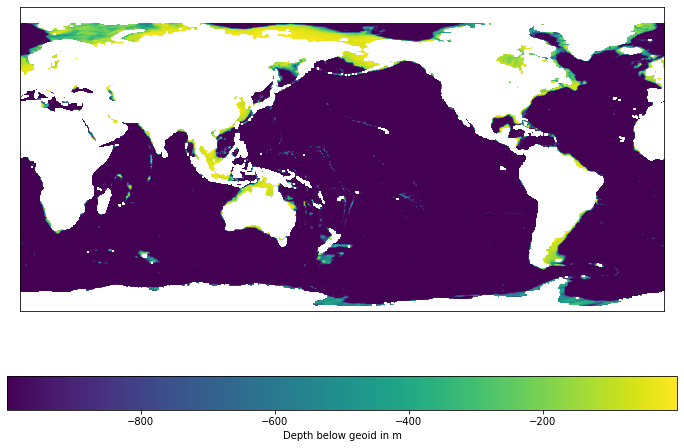

In [17]:
# Bathymetry (sea_floor_depth_below_geoid)
fig = plt.figure(figsize=(20,8))
plt.imshow(ds['deptho'][:,:])
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.colorbar(orientation='horizontal', label='Depth below geoid in m', shrink=0.6);